<h2> Exploring and  preparing the data for analysis:  </h2> 
 We start with the import of packages we will eventually need. Furthermore, we import the datasets and start with exploring and preparing the data for further analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from statistics import mean , stdev

from sklearn.model_selection import cross_val_score

np.random.seed(0)

import seaborn as sns
sns.set()

movies = pd.read_csv('./dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('./dataset/tmdb_5000_credits.csv')

Let's take a look at the data

In [2]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We notice that the columns 'genres', 'keywords', 'production_companies', 'production_countries' and 'spoken_languages' are of the dictionary type (they have nominal values). 

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Also the credits dataset inclueds only attribute with nominal values.
Do the two dataset contain information for the same films? Let's check it.

In [4]:
(credits['title']==movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

This tells us that every row in the credits data base has the same movie title as the same row in the movies data base.

<h2>Numerical Analysis</h2> 
In this section We will try to predict the popularity of a film. We will use for this frst attempt only the numerical attribute. However he feature with values of dictionary type are very important and they give us a lot of information. We will analyze them in the next sections figure out how use them.

In [5]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movies_num = movies[num_list]
movies_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


<h3>Preprocessing</h3> 

In [6]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movies_num = movies[num_list]

# Get popularity values and remove them from the dataset
target = movies["popularity"]
movies_num = movies_num.drop(["popularity"], axis=1)
# Substitue NaN values with 0 
movies_num = movies_num.fillna(0)

# Normalize (min-max-scaler)
movies_num_min = movies_num.min()
movies_num_max = movies_num.max()
target_min = target.min()
target_max = target.max()
movies_num -= movies_num_min
movies_num /= movies_num_max
target -= target_min
target /= target_max

X = movies_num.values
y = target.values

Split data with the classic 70/30

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1234)

<h3>SVM</h3> 

In [8]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
svr_lin = SVR(kernel='linear', C=1e3, gamma='auto')
svr_poly_2 = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr_poly_3 = SVR(kernel='poly', C=1e3, degree=3, gamma='auto')

scores = cross_val_score(svr_rbf, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE RBF: {mean(scores)}")
scores = cross_val_score(svr_lin, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE Linear: {mean(scores)}")
cores = cross_val_score(svr_poly_2, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE POLYNOMIAL (DEGREE=2): {mean(scores)}")
scores = cross_val_score(svr_poly_3, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE POLYNOMIAL (DEGREE=3): {mean(scores)}")

MSE RBF: -0.0019628820511698214
MSE Linear: -0.002042375005939006
MSE POLYNOMIAL (DEGREE=2): -0.002042375005939006
MSE POLYNOMIAL (DEGREE=3): -0.0028356063656670167


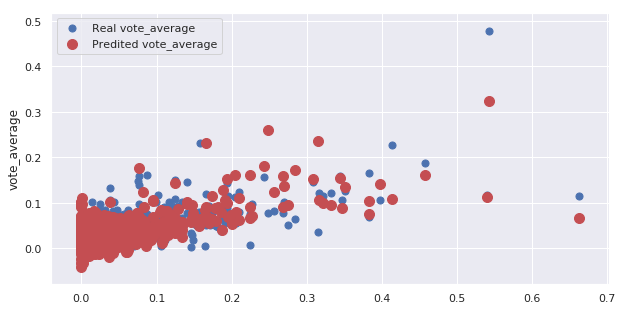

In [9]:
# Train the model using the training sets
svr_rbf.fit(X_train, y_train)
# Make predictions using the testing set
y_pred_svr_rbf = svr_rbf.predict(X_test)

f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_svr_rbf,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

<h3>Random Forest</h3> 

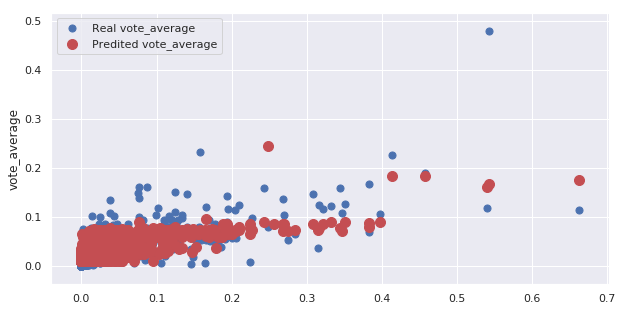

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Create linear regression object
rf = RandomForestRegressor(max_depth=2, random_state=1234, n_estimators=100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test)

f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_rf,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [11]:
scores = cross_val_score(rf, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE: {mean(scores)}")

MSE: -0.0006682889838991262


<h3> Neural Network </h3>

In [12]:
import tensorflow as tf
tf.set_random_seed(12345)

arr = np.arange(movies_num.shape[0])
index_test = np.random.choice(arr, int(0.25 * movies_num.shape[0]), replace=False)
index_train = np.setdiff1d(arr, index_test)

# Use the indexes to form the training and test sets
x_test = movies_num.loc[index_test]
y_test = target.loc[index_test]
x_train = movies_num.loc[index_train]
y_train = target.loc[index_train]

# Train using 3 neurons in the hidden layer
MLP = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(movies_num.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

MLP.compile(optimizer=tf.keras.optimizers.Adadelta(0.001), loss="mse")
mlp = MLP.fit(x_train, y_train, epochs=10)

# Return the loss on the test set
print(f"Loss on the test set: {MLP.evaluate(x_test, y_test)}")


Epoch 1/10
3603/3603 [==============================] - 0s 75us/step - loss: 0.1188
Epoch 2/10
3603/3603 [==============================] - 0s 31us/step - loss: 0.1182
Epoch 3/10
3603/3603 [==============================] - 0s 30us/step - loss: 0.1176
Epoch 4/10
3603/3603 [==============================] - 0s 29us/step - loss: 0.1170
Epoch 5/10
3603/3603 [==============================] - 0s 31us/step - loss: 0.1163
Epoch 6/10
3603/3603 [==============================] - 0s 31us/step - loss: 0.1156
Epoch 7/10
3603/3603 [==============================] - 0s 30us/step - loss: 0.1148
Epoch 8/10
3603/3603 [==============================] - 0s 32us/step - loss: 0.1140
Epoch 9/10
3603/3603 [==============================] - 0s 33us/step - loss: 0.1132
Epoch 10/10
1200/1200 [==============================] - 0s 36us/step
Loss on the test set: 0.1120520559946696


<h2>Feature analysys</h2>

In [13]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

movies = load_tmdb_movies('./dataset/tmdb_5000_movies.csv')
credits = load_tmdb_credits('./dataset/tmdb_5000_credits.csv')
movies.describe().round()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4803.0,4.803000e+03,4801.0,4803.0,4803.0
mean,29045040.0,57165.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,88695.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,9014.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,14629.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,58610.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,459488.0,876.0,2.787965e+09,338.0,10.0,13752.0


Runtime consists of a few empty values. We use an imputer for this:

/home/emanuele/anaconda3/envs/IMDBPopularityPrediction/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27c3fb2d30>,
      dtype=object)

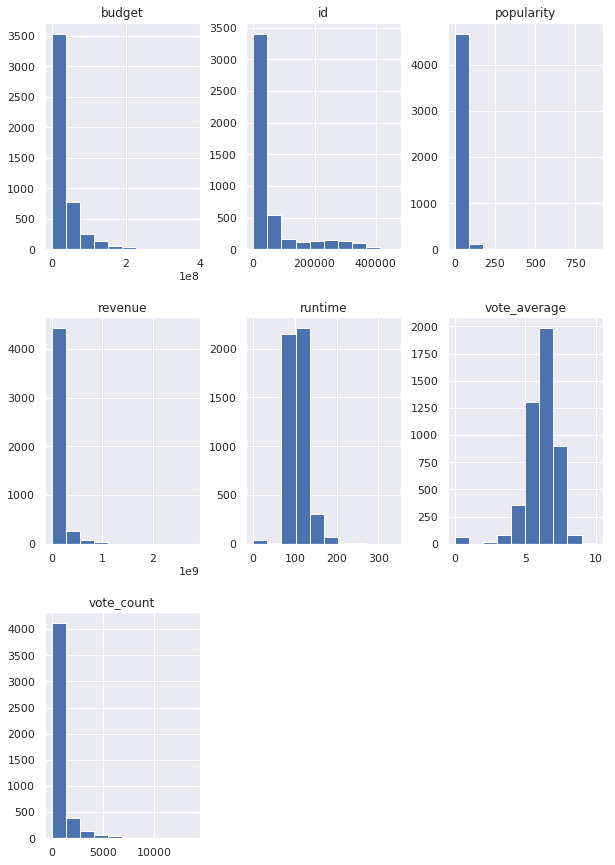

In [14]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
movies.hist(ax=ax)

In [15]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

X2 = my_imputer.fit_transform(movies[['runtime']])
movies['runtime'] = X2
movies.describe().round()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4803.0,4.803000e+03,4803.0,4803.0,4803.0
mean,29045040.0,57165.0,21.0,8.226064e+07,107.0,6.0,690.0
std,40722391.0,88695.0,32.0,1.628571e+08,23.0,1.0,1235.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,9014.0,5.0,0.000000e+00,94.0,6.0,54.0
50%,15000000.0,14629.0,13.0,1.917000e+07,103.0,6.0,235.0
75%,40000000.0,58610.0,28.0,9.291719e+07,118.0,7.0,737.0
max,380000000.0,459488.0,876.0,2.787965e+09,338.0,10.0,13752.0


Films may be classified based on their runtime:

In [16]:
def convertRuntime(movies):
    movies['runtime'] = pd.cut(movies['runtime'], [0, 75, 338], labels=['low', 'high'])
    for length in ["low", "high"]:
        movies[length] = movies['runtime'].str.contains(length).apply(lambda x: 1 if x else 0)

    return movies

movies = convertRuntime(movies)

In [17]:
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

def convertGenres(movies):
    movies['genres'] = movies['genres'].apply(pipe_flatten_names)

    liste_genres = set()
    for s in movies['genres'].str.split('|'):
        liste_genres = set().union(s, liste_genres)
    liste_genres = list(liste_genres)
    liste_genres.remove('')

    for genre in liste_genres:
        movies[genre] = movies['genres'].str.contains(genre).apply(lambda x: 1 if x else 0)

    return movies

movies = convertGenres(movies)
movies = movies.drop(
        ["genres", "homepage", "id", "keywords", "original_language", "original_title", "overview",
         "production_companies", "production_countries", "spoken_languages", "status", "tagline", "title", "release_date", "runtime"], axis=1)

movies.describe()

,budget,popularity,revenue,vote_average,vote_count,low,high,Science Fiction,Crime,Foreign,...,Western,Comedy,Drama,Music,Action,Mystery,Animation,Adventure,History,Thriller
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.00000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989,0.01624,0.991047,0.111389,0.144909,0.007079,...,0.017073,0.358526,0.478243,0.038518,0.240267,0.072455,0.048720,0.164481,0.041016,0.265251
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891,0.12641,0.094204,0.314646,0.352046,0.083847,...,0.129556,0.479618,0.499578,0.192462,0.427290,0.259266,0.215304,0.370750,0.198348,0.441513
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn import preprocessing

num_list = ['budget','popularity','revenue','vote_average','vote_count']
cols_to_normalize = [x for x in list(movies) if x in num_list]

cols = movies[cols_to_normalize]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(cols)
df_temp = pd.DataFrame(x_scaled, columns = num_list, index = movies.index)
movies[num_list] = df_temp

movies.head()

target = movies.popularity
movies = movies.drop('popularity', axis=1)

/home/emanuele/anaconda3/envs/IMDBPopularityPrediction/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
scores = cross_val_score(svr_rbf, movies, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE RBF: {mean(scores)}")
scores = cross_val_score(svr_lin, movies, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE Linear: {mean(scores)}")
cores = cross_val_score(svr_poly_2, movies, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE POLYNOMIAL (DEGREE=2): {mean(scores)}")
scores = cross_val_score(svr_poly_3, movies, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE POLYNOMIAL (DEGREE=3): {mean(scores)}")
print("\n")

scores = cross_val_score(rf, movies, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE: {mean(scores)}")

MSE RBF: -0.0025834631347081685
MSE Linear: -0.0021273854479388495
MSE POLYNOMIAL (DEGREE=2): -0.0021273854479388495
MSE POLYNOMIAL (DEGREE=3): -0.002015631308503189


MSE: -0.0006683346789409194


<h2>Cast</h2>
We have imported a new dataset including actors and movie's director information. 